Exercise with TensorFlow 2.0¶

So far, we only have used NumPy as a computational library, but there are Python libraries tailored for machine learning. Those are TensorFlow and Sklearn. In this notebook we will recreate our machine learning algorithm using TF 2.0. One of the biggest avantages of TensorFlow is it uses only the CPU on the computer but also it's GPU. TensorFlow is a deep leaarning library developed by Google that allows us to creaate fairy complicated models with little coding. 

## Import the relevant libraries

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [47]:
print(tf.__version__)

2.16.1


## Generate Data

## Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [61]:
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of x and z is observations x 1. In this case: 1000 x 1
x = np.random.uniform(low=-10, high=10, size=(observations,1))
z = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one
generated_inputs = np.column_stack((x,z))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*x - 3*z + 5 + noise

# We want a format that can store the information in tensors. Data --- Preprocess --- save in .npz
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)


## Solving with TensorFlow

In [63]:
training_data = np.load('TF_intro.npz')

In [64]:
# There are two independent variabels x and z and one dependent variable.
input_size = 2

# Declare the output size of the model
# It should be equal to the number of outputs you've got (for regressions that's usually 1)
output_size = 1

# when we are employing TensorFlow, we must actually build the model
# TF 2. is based on keras, so that's the modul needed to build a model.
# tf.keras.Sequential is a function that specifies how the model will be laid down ('stack layer')
# Linear combination + output = Layer
# output using NumPy : output = np.dot(input, weights) + bias, in TensorFlow, function tf.keras.layers.Dense takes the input 
# provided to the model and calculate the dot product of the inputs and the weights and add bias. It also applies activation function (optional)

# Outline the model
# We lay out the model in 'Sequential'
# Note that there are no calculations involved - we are just describing our network
model = tf.keras.Sequential([
                            # Each 'layer' is listed here
                            # The method 'Dense' indicates, our mathematical operation to be (xw + b)
                            tf.keras.layers.Dense(output_size,
                                                 # there are extra arguments you can include to customize your model
                                                 # in our case we are just trying to create a solution that is 
                                                 # as close as possible to our NumPy model
                                                 kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                 bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function 
# That's much harder to implement and won't be covered in this course though

# 'compile' is the place where you select and indicate the optimizers and the loss
# sgd = stochastic gradient descent
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# finally we fit the model, indicating the inputs and targets
# if they are not otherwise specified the number of epochs will be 1 (a single epoch of training), 
# so the number of epochs is 'kind of' mandatory, too
# we can play around with verbose; we prefer verbose=2
# epoch  = iteration, verbose = 0 stands for 'silent' or no output about the training is displayed, 
# verbose = 1, for 'progress bar' and verbose = 2, for 'one line per epoch
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - 10ms/step - loss: 22.6370
Epoch 2/100
32/32 - 0s - 1ms/step - loss: 1.1812
Epoch 3/100
32/32 - 0s - 1ms/step - loss: 0.4446
Epoch 4/100
32/32 - 0s - 1ms/step - loss: 0.3890
Epoch 5/100
32/32 - 0s - 1ms/step - loss: 0.4216
Epoch 6/100
32/32 - 0s - 1ms/step - loss: 0.3864
Epoch 7/100
32/32 - 0s - 1ms/step - loss: 0.4172
Epoch 8/100
32/32 - 0s - 1ms/step - loss: 0.3837
Epoch 9/100
32/32 - 0s - 1ms/step - loss: 0.3846
Epoch 10/100
32/32 - 0s - 1ms/step - loss: 0.3806
Epoch 11/100
32/32 - 0s - 1ms/step - loss: 0.3980
Epoch 12/100
32/32 - 0s - 1ms/step - loss: 0.3877
Epoch 13/100
32/32 - 0s - 1ms/step - loss: 0.3872
Epoch 14/100
32/32 - 0s - 1ms/step - loss: 0.4188
Epoch 15/100
32/32 - 0s - 1ms/step - loss: 0.3857
Epoch 16/100
32/32 - 0s - 1ms/step - loss: 0.3986
Epoch 17/100
32/32 - 0s - 1ms/step - loss: 0.4262
Epoch 18/100
32/32 - 0s - 1ms/step - loss: 0.3916
Epoch 19/100
32/32 - 0s - 1ms/step - loss: 0.3945
Epoch 20/100
32/32 - 0s - 1ms/step - loss: 0.3779
Epoch 2

our model is 2x - 3z + 5 + noise

### Extract the weights and bias

Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [67]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

[array([[ 1.980452 ],
        [-3.0645168]], dtype=float32),
 array([5.0107565], dtype=float32)]

In [68]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weights = model.layers[0].get_weights()[0]
weights

array([[ 1.980452 ],
       [-3.0645168]], dtype=float32)

In [69]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0107565], dtype=float32)

### Extract the outputs (make predictions)

Once more, this is not an essential step, however, we usually want to be able to make predictions.

In [71]:
# model.predict_on_batch : calculates the outputs given inputs
# these are the values that were compare to the targets to evaluate loss function

model.predict_on_batch(training_data['inputs']).round(1)

array([[-20.1],
       [-43.7],
       [ 38.2],
       [  8.8],
       [-15.2],
       [-30.2],
       [  5.6],
       [-36.3],
       [-17.7],
       [ -1.9],
       [  7.3],
       [ 10.6],
       [-34.9],
       [-11.6],
       [ 33.9],
       [ 38.2],
       [-16.4],
       [  6.5],
       [ -7.8],
       [ 29.4],
       [ 17.1],
       [ -6.3],
       [  1.2],
       [ 17.8],
       [-10.5],
       [-18.3],
       [ 41.8],
       [ 20. ],
       [ 14.5],
       [ 31.3],
       [ 49. ],
       [ 28.1],
       [-16.2],
       [ -8.2],
       [-29.5],
       [ 41.8],
       [ 12.1],
       [  8.5],
       [ 13.1],
       [  1.4],
       [ -9.8],
       [  6.6],
       [-20.9],
       [ 28.1],
       [ -2.5],
       [ 50.3],
       [-20.2],
       [-33.8],
       [ -2.2],
       [-17. ],
       [ 28.4],
       [ 12.8],
       [  1.1],
       [ 26.5],
       [ 20.8],
       [ 25.9],
       [ -3.8],
       [ 36.3],
       [-34.3],
       [  3.5],
       [-17.5],
       [ -3.9],
       [

In [72]:
training_data['targets'].round(1)

array([[-19.9],
       [-42.4],
       [ 37.9],
       [  9.4],
       [-15.7],
       [-30.4],
       [  5.2],
       [-35.6],
       [-18.3],
       [ -2.7],
       [  6.9],
       [  9.8],
       [-34.7],
       [-10.4],
       [ 33.7],
       [ 37.4],
       [-16.7],
       [  5.4],
       [ -7.5],
       [ 29.5],
       [ 16.6],
       [ -6.4],
       [  1. ],
       [ 17.4],
       [ -9.1],
       [-18.3],
       [ 41. ],
       [ 20.2],
       [ 13.5],
       [ 30.7],
       [ 49.2],
       [ 26.7],
       [-16.4],
       [ -7.7],
       [-28.8],
       [ 41.9],
       [ 12.1],
       [  8.8],
       [ 14.3],
       [  2.3],
       [-10.4],
       [  6. ],
       [-21.4],
       [ 27.8],
       [ -0.9],
       [ 49.1],
       [-19.7],
       [-32.5],
       [ -2.7],
       [-18. ],
       [ 27.3],
       [ 11.6],
       [  0.7],
       [ 26.6],
       [ 19.3],
       [ 25.8],
       [ -3.8],
       [ 36.4],
       [-34.5],
       [  2.5],
       [-17.9],
       [ -3.3],
       [

### Plot the data

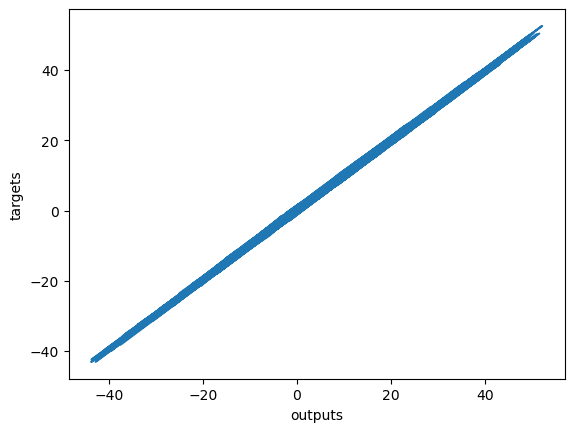

In [74]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot function expects.
# Doesn't change anything as we cut dimensions of size 1 - just a technicality.
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper in the next chapter,
# TensorFlow will save us hundreds of lines of code.

The result is same to the result that we had using NumPy